# Introduction

As a professor, I am often called upon to advise students. I teach at a college with a petroleum engineering program, and in recent years (up until the price of oil took a nosedive last year, in fact) the program was very successful, both in terms of attracting students as well as getting them placed in good jobs. At this point, though (February of 2016, as of this writing), a barrel of oil costs less than the barrel to put it in, and that's having a negative impact on the job prospects of our graduates (to put it mildly). I've had a couple of conversations lately with students who have a very different perspective on the job market than I do, and so I became interested in seeing what data was available and what conclusions I could draw from it. The actual comment that made me want to do this analysis was, and I quote, "I believe in oil." On the other hand, he was talking to me about other options, so his belief may not harm him too much.

**TL;DR:** After looking at the data I personally think now is not a good time to get into the petroleum industry, and students who are going to graduate in the next few years with Petroleum Engineering degrees will have an extremely hard time getting jobs. Draw your own conclusions.

There are three pieces to the puzzle:

1. The number of available jobs
2. The price of oil.
3. The number of people with petroleum engineering degrees (i.e., the competition)

Obviously, the price of oil has a causal effect; if the price is too low, then companies can't hire, or may go out of business. More on that later.  We'll begin with the number of jobs.

### Disclaimers:

- I'm not an economist, and so the economic part of the analysis is more suggestive than rigorous
- While I do aspire to the Buddhist ideal of Right Livelihood, what you choose for your career isn't really any of my business. I'm not trying to convert anyone here; I just think people should make decisions with full information.
- I don't take any responsibility for what you choose to do with your life. (This should be a given)
- My analysis can only ever be as good as my data sources. All of the data are publicly available from US Government sources (details are below).


## Jobs in the petroleum industry

I'm only considering jobs in the US, here. I'm not sure (off the top of my head) where to get data on the international oil scene, and I think it's much less relevant to most of our students. We get statistics on jobs from the Employment, Hours, and Earnings portion of the Current Employment Statistics available from the [Bureau of Labor Statistics](http://www.bls.gov). (The specific survey data is available [here](http://download.bls.gov/pub/time.series/ce/) ).

In [1]:
import sys
import os.path as op
import numpy as np
import pandas as pd
import numpy.testing as npt
from matplotlib import pyplot as plt

sys.path.append("..")
import jobsdata as jd

data_path = op.join(jd.__path__[0], 'data')
%matplotlib inline

# suppress warnings from pandas for publication
import warnings
warnings.filterwarnings('ignore')

#ignore
# this setup stuff doesn't need to be included in the blog post.

The employment data is arranged by [NAICS code](http://www.naics.com). NAICS are a way of coding the industry businesses work in; codes have up to 6 digits with increasing specificity. The umbrella code for oil and gas extraction is 211. This isn't the whole petroleum industry, of course, but it's representative, and it is the field most of our petroleum engineering graduates end up in. 

This data set goes back to 1972. We can extract and plot the total number of people employed in this sector as a function of time. Other series in the data look at things like hours worked, hourly/weekly pay, and so on, but I'm not interested in those for right now.

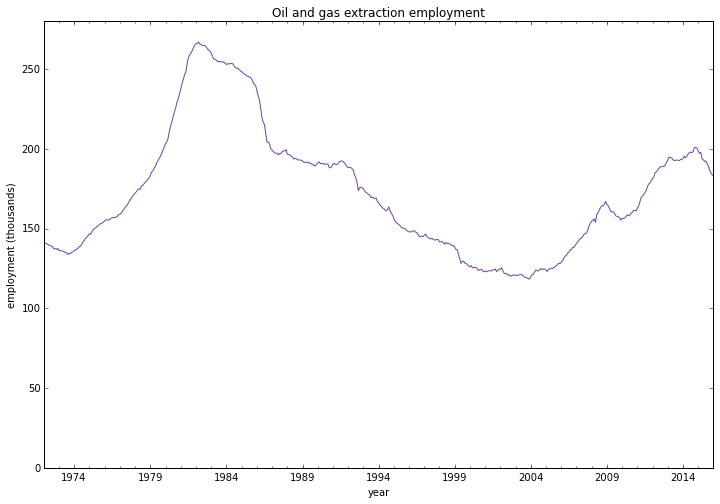

In [2]:
emp = jd.EmploymentData()
emp_df, industry_name = emp.extract_data_for_naics(211)
emp.emp_plot(emp_df, industry_name)

The headline feature here is **boom and bust cycles**. In the early 1980s there was a huge upswing in oil and gas extraction employment, and then in 1986, the bottom fell out and the industry didn't realy start recovering (in an employment sense) for about 20 years. Jobs were on the upswing from 2004 to 2015, with a brief dip in 2009 for the Great Recession. We're currently in a slide. The big question is: **Is the current slide more like 1986, or more like 2009?** If it's the latter, a little bit of riding things out is all that's needed; if it's the former, it's time to seriously consider career change.

A detailed answer to that question is going to be very complex, so I'll leave it to people who know more about the industry than I do. In looking for this data, I found people on both sides of the argument. Perhaps unsurprisingly, the people who most adamantly claimed that things are different now than they were in 1986 were associated with the oil industry; those who were with financial institutions seemed to see stronger similarities.

Anyway, even if we don't dig into the geopolitics and other complicated issues that contribute to this picture, we can look at least one factor: oil prices.

## Oil Prices

Oil price data comes from the [US Energy Information Administration](http://www.eia.gov/petroleum/data.cfm#prices). It turns out there's more than one price that one could use here. I opted for *US Crude oil composite acquisition cost by refiners*, mostly because it covered about the same range of time as my employment data. A quick look at the other price indicies gave me the impression that the major features are pretty similar, though, so I'm not sure how much this choice matters.  Again, we plot a time series.

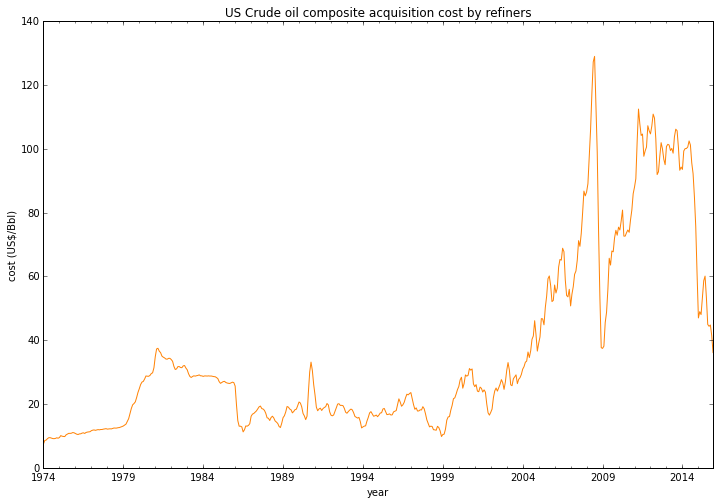

In [3]:
prices = jd.PriceData()
prices.plot()

The price drop in 1986 looks pretty small in absolute terms, especially when compared the the drops in late 2008 and 2014-2015. In relative terms, though (as we will see in a bit) it was pretty catastrophic. Interestingly, the spike in prices in 1991 (corresponding to the first Gulf War) didn't do much to employment, even though the peak price was as high as it had been in the early 80s.

The drop in 2008 due to the Great Recession was enormous, but price recovered relatively quickly, which is perhaps why employment didn't take as hard a hit as with the 1986 price crash. I'll plot these two graphs on top of each other in a second to make comparisons easier, but first, I want to bring in the third piece of the puzzle: petroleum engineering degrees.

## Bachelor's degrees in Petroleum Engineering

This data comes from individual institutions through [IPEDS](http://nces.ed.gov/ipeds/datacenter/DataFiles.aspx), and sadly, it only goes back to 1984. My approach here is pretty brute-force, and so if you're running this on your own, you'll need to be a little patient for this step. Basically, we load the list of all graduates of every major from every institution, and then pare down to the petroleum engineering grads.

Bachelor's degrees are by far the most common, though there are a smattering of other degrees, as well.

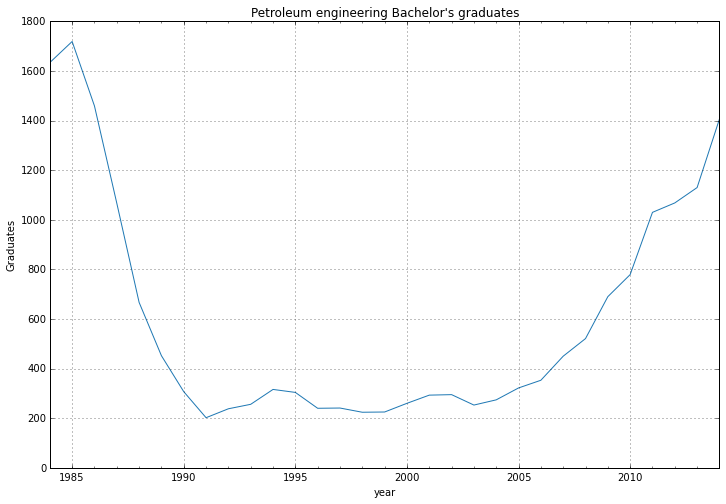

In [4]:
grads = jd.GradData()
grads_df = grads.extract_grads_by_cip(14, 2501)
grads.plot()

The trend here is pretty predictable. Following the dramatic decrease in jobs in 1986, the number of graduates dropped pretty rapidly to a low level, and then stayed there for about 15 years. When employment started picking back up in 2004 or so, the number of graduates did, too. We'll be better able to see the details when we plot jobs and degrees on the same set of axes, below.

There are a few sources of time lag in this data relative to the employment data. The main one, of course, is that it takes about 4 years to get a degree if you're starting from scratch. Additionally, once you're in a degree program, and especially if you're nearing the end of the program, it's increasingly hard to change or get out.

The data is reported annually, and the most recent data we have is a year older than one might think it could be (2014 graduates) so we haven't yet begun to see a dropoff in number of graduates. From my experience at a school with a petroleum engineering program, we have a couple more large years in the pipeline before things taper off, though that may change if the students decide there isn't much hope of getting a job.

## Relationships between these factors

Obviously there's a causal link between oil price and jobs, but it becomes more striking if we put the two series on the same plot.

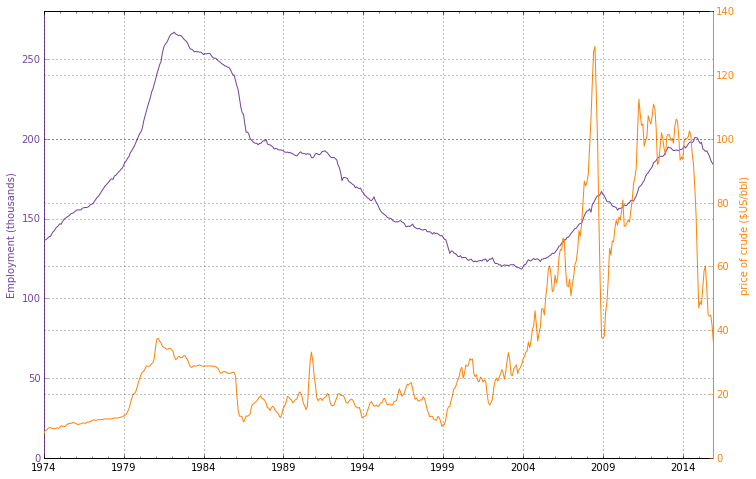

In [5]:
cmb = jd.CombinedData(emp, prices, grads)
cmb.plot_jobs_and_prices()

It's really clear here that the major drops in price occur at the beginning of major drops in number of jobs. The only real exception is 1999, where there's a drop in jobs while the price is climbing. I'm not going to pretend to understand that one, or try to explain it, except possibly to argue that rising prices slowed the loss of jobs (as the slope of the jobs graph mellows out at that point).

The bad news (for someone going in to the field) is that jobs don't seem to start recovering after a bad price drop until the price has not only stopped falling, but has significantly recovered. It's pretty clear in the 1986 crash, where job loss slowed (though didn't completely stop) in about 1988, after the price had recovered about half of its price drop; in 2009 the story is similar, though the numbers differ a little bit. In the current price dip, there's no real indication that price has bottomed out yet, much less made any kind of recovery. 

The really interesting thing, though, happens when we time shift the 1986 crash and the current price situation, and plot them on top of each other.

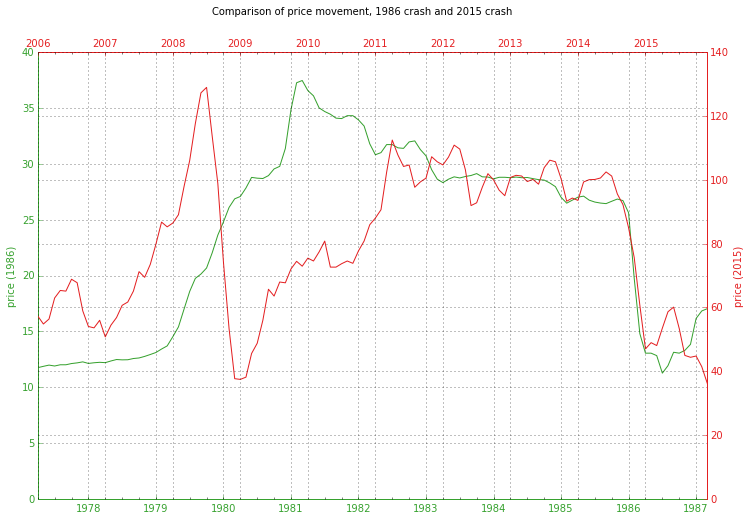

In [6]:
cmb.shifted_plot('price', title="Comparison of price movement, 1986 crash and 2015 crash")

I can't claim credit for seeing this on my own (though I was very interested in the question of how big of a *fractional* change each price drop represented); I came across it in [an analysis from Morgan Stanley](http://www.morganstanley.com/ideas/oil-price-plunge-is-so-1986), and thought I'd try to reproduce it. I find this plot really striking for a couple of reasons. While the price scales are quite different, the relative change in price is quite similar. 

I also found similarities in timing between the two cases interesting. Both crashes had about 3 and a half years of flattish high prices before the price fell, and then the two drops happened in about the same amount of time.

The employment pictures of the two events look a little different:

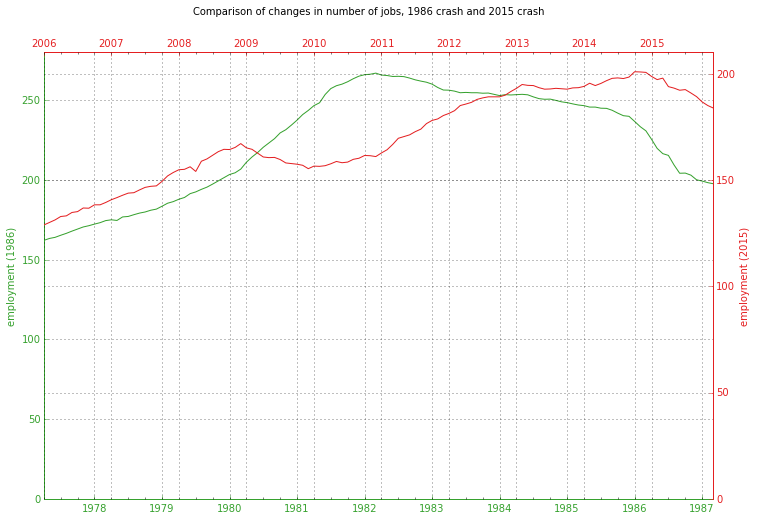

In [9]:
cmb.shifted_plot('employment', title="Comparison of changes in number of jobs, 1986 crash and 2015 crash")

Zoomed out like this, the changes in employment don't look all that dramatic, but remember that the majority of this is lead up to the price crash, and that the effects of price on employment take a while to fully develop. That said, the response in 1986 was much more immediate than the one in 2015 (which we're actually just beginning to see).
My guess (and that's all it is) is that the rapid crash-then-recovery in 2009 slowed employers' response to the price drop in 2015. They may have thought they could wait it out and that prices would recover as quickly as they had in 2009. Now that it has started, though, I think we can expect employment to continue to fall at least until prices start to move upward again.

Another difference between the two cases is that in 1986, employment was already adjusting downward during the pre-crash plateau, in response to a modest decline in prices. Prior to the 2015 crash, employment was actually on its way up. I think institutional inertia played a role here, as some firms didn't stop hiring (or start downsizing) early enough.

The really frightening story, though, from where I sit, is told by the plot that shows both the number of jobs and the number of graduates. In this plot the number of graduates looks less smooth than the number of jobs because graduates are reported annually, while jobs are reported monthly.

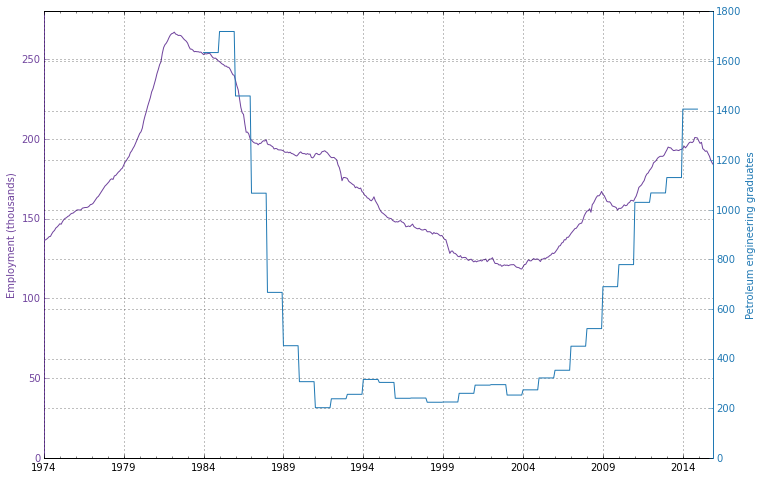

In [8]:
cmb.plot_jobs_grads()

My institution is both small and highly tuition-dependent, which means that even small numbers of students lost or gained have a significant effect on our budget. Over the last five years or so petroleum engineering students have become the largest single segment of our student population, to the point that in the last couple of years, they've made up between a quarter and a third of our incoming freshmen class. As this graph shows, though, when there is a decline in jobs, the bottom falls out of the number of graduates--and that's perfectly reasonable!

Based on this 30 year sample, it looks as though the demand for petroleum engineering degrees both lags behind the demand for workers in the industry and overcorrects for changes in the job market. The message to institutions like mine is clear: soon and very soon, those petroleum engineering students will be going away, and they won't come back until the job market gets a lot better. We've already seen the leading edge of this trend; this year has been especially difficult for recruiting, and our admissions folks say it's primarily due to fall-off in interest for the petroleum engineering program.

This lag between job market shrinkage and degree demand is also quite problematic for job seekers. First of all, the number of new job seekers continues to increase for a little while even as the number of jobs shrinks. Second, the people who have just lost their jobs are also looking, and have more experience than the people who are fresh graduates. The general picture is pretty grim.

## Conclusions

If you've made it this far, you ought to be able to draw your own conclusions, but here are mine:

1. If you're nearing the end of a petroleum engineering program, I'm sorry. I think it's going to be tough for you.
2. If you're at the beginning of a petroleum engineering program, I think you'll be better served by looking into other options.
3. If you're contemplating a career in petroleum engineering, you may have missed your window.
4. If you're a school like mine, you need to aggressively recruit students outside of petroleum engineering, and should have been doing so for the past few years.

## Colophon
This post was writen as a [Jupyter Notebook](http://jupyter.org), then imported into [Pelican](https://github.com/getpelican/pelican) via Daniel Rodriguez' [pelican-ipynb](https://github.com/danielfrg/pelican-ipynb) plugin. Source notebook and data is available on [github](https://github.com/tachycline/petro-career-advice.git).